# ИСКЛЮЧАЮЩЕЕ ИЛИ

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [4]:
or_df = pd.DataFrame({'in1': [0, 0, 1, 1], 'in2': [0, 1, 0, 1], 'out': [1, 0, 0, 1]})
or_df

,in1,in2,out
0,0,0,1
1,0,1,0
2,1,0,0
3,1,1,1


In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [6]:
def feedforward_propagation(x, W1, W2):
    Z1 = np.dot(x, W1)
    A1 = sigmoid(Z1)

    Z2 = np.dot(A1, W2)
    A2 = sigmoid(Z2)

    return A1, A2

In [7]:
def backpropagation_propagation(y, A1, A2, W2):
    L1 = A2 - y
    dW1 = L1 * A2 * (1 - A2)

    L2 = np.dot(dW1, W2.T)
    dW2 = L2 * A1 * (1 - A1)

    return dW1, dW2

In [8]:
def update_weight(x, A1, dW1, dW2, W1, W2, N, learning_rate):
    W2_update = np.dot(A1.T, dW1) / N
    W1_update = np.dot(x.T, dW2) / N

    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate * W1_update

    return W1, W2

In [9]:
def mape(y_pred, y_true):
    return ((np.abs(y_pred - y_true)).sum())/(y_true.sum())

In [10]:
def accuracy(y_pred, y_true):
    acc = y_pred.argmax(axis=1) == y_true.argmax(axis=1)
    return acc.mean()

In [11]:
def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true)**2).sum()/(y_pred.size)

In [12]:
def backpropagation(x, y, learning_rate=0.01, epoch=10000, hidden_size=8, itsPrint=True, isMape=False):
    results = pd.DataFrame(columns=["mse", "accuracy"])

    N = x.shape[0]
    input_size = x.shape[1]
    output_size = y.shape[1]

    W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))   
    W2 = np.random.normal(scale=0.5, size=(hidden_size , output_size))

    for eph in range(epoch+1):    
        
        A1, A2 = feedforward_propagation(x, W1, W2)
    
        mse = mean_squared_error(A2, y)
        acc = accuracy(A2, y)
        results = results._append({'mse': mse, 'accuracy': acc}, ignore_index = True)
        if itsPrint and not isMape:
            if eph%(epoch//10)==0:
                print(f"epoch {eph}: \n\tmse: {mse}, \taccuracy: {acc}")

        if itsPrint and isMape:
            if eph%(epoch//10)==0:
                print(f"epoch {eph}: \tmape: {mape(A2, y)}")
        
        
        dW1, dW2 = backpropagation_propagation(y, A1, A2, W2)
        W1, W2 = update_weight(x, A1, dW1, dW2, W1, W2, N, learning_rate)

    return W1, W2, results

In [13]:
X = or_df[or_df.columns[:-1]]
y = pd.get_dummies(or_df[or_df.columns[-1]]).values

In [14]:
W1, W2, results = backpropagation(X, y, epoch = 10000, learning_rate=0.1, hidden_size=16)

epoch 0: 
	mse: 0.31497994551074604, 	accuracy: 0.5
epoch 1000: 
	mse: 0.23963486202862216, 	accuracy: 0.75
epoch 2000: 
	mse: 0.2223605888569774, 	accuracy: 0.75
epoch 3000: 
	mse: 0.1924105785910628, 	accuracy: 1.0
epoch 4000: 
	mse: 0.15578285222456373, 	accuracy: 1.0
epoch 5000: 
	mse: 0.11886133359596558, 	accuracy: 1.0
epoch 6000: 
	mse: 0.08716211743325429, 	accuracy: 1.0
epoch 7000: 
	mse: 0.06342831804230152, 	accuracy: 1.0
epoch 8000: 
	mse: 0.04704772847623772, 	accuracy: 1.0
epoch 9000: 
	mse: 0.035996799053332626, 	accuracy: 1.0
epoch 10000: 
	mse: 0.028438491367349467, 	accuracy: 1.0


#### График СКО

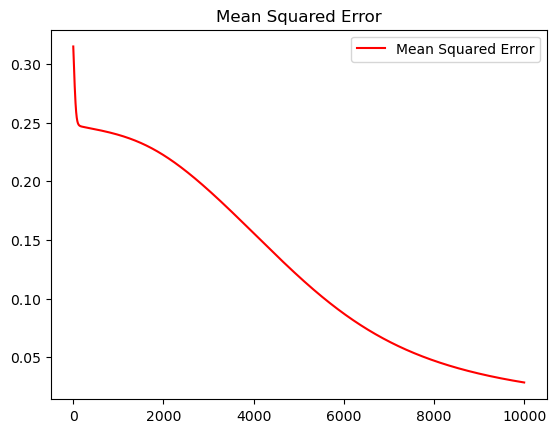

In [15]:
plt.plot(results.mse, color='red', label="Mean Squared Error")
plt.title("Mean Squared Error")
plt.legend()
plt.show()

#### График точности

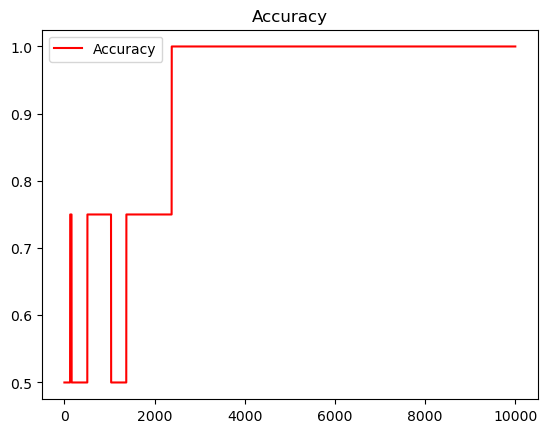

In [16]:
plt.plot(results.accuracy, color='red', label="Accuracy")
plt.title("Accuracy")
plt.legend()
plt.show()

In [17]:
A1, A2 = feedforward_propagation(np.array([[1, 0], [0, 0]]) , W1, W2)
acc = accuracy(A2, pd.get_dummies([0, 1]).values)
acc

1.0

#### Обучение для исключаюшего "ИЛИ"

In [18]:
xor_4_df = []
for i in range(16):
    x = i//8
    y = (i//4)%2
    z = (i//2)%2
    w = i%2
    res = x ^ y ^ z ^ w
    xor_4_df.append([x, y, z, w, res])

In [19]:
xor_4_df = pd.DataFrame(xor_4_df, columns=['x','y','z','w','res'])
xor_4_df

,x,y,z,w,res
0,0,0,0,0,0
1,0,0,0,1,1
2,0,0,1,0,1
3,0,0,1,1,0
4,0,1,0,0,1
5,0,1,0,1,0
6,0,1,1,0,0
7,0,1,1,1,1
8,1,0,0,0,1
9,1,0,0,1,0


#### Разделение переменных на признаки и целевые

In [20]:
X = xor_4_df[xor_4_df.columns[:-1]]
y = pd.get_dummies(xor_4_df[xor_4_df.columns[-1]]).values

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [22]:
W1, W2, results = backpropagation(X_train, y_train, epoch = 40000, learning_rate=0.1, hidden_size=32)

epoch 0: 
	mse: 0.3331252231222699, 	accuracy: 0.46153846153846156
epoch 4000: 
	mse: 0.23710208806635633, 	accuracy: 0.6923076923076923
epoch 8000: 
	mse: 0.22864129958072615, 	accuracy: 0.6923076923076923
epoch 12000: 
	mse: 0.1926292823087786, 	accuracy: 0.7692307692307693
epoch 16000: 
	mse: 0.14358812651754638, 	accuracy: 0.9230769230769231
epoch 20000: 
	mse: 0.1159999058912023, 	accuracy: 0.9230769230769231
epoch 24000: 
	mse: 0.10158932776657995, 	accuracy: 0.9230769230769231
epoch 28000: 
	mse: 0.09217256637906347, 	accuracy: 0.9230769230769231
epoch 32000: 
	mse: 0.07986653691114849, 	accuracy: 0.9230769230769231
epoch 36000: 
	mse: 0.054234530235797794, 	accuracy: 0.9230769230769231
epoch 40000: 
	mse: 0.030737388926960825, 	accuracy: 1.0


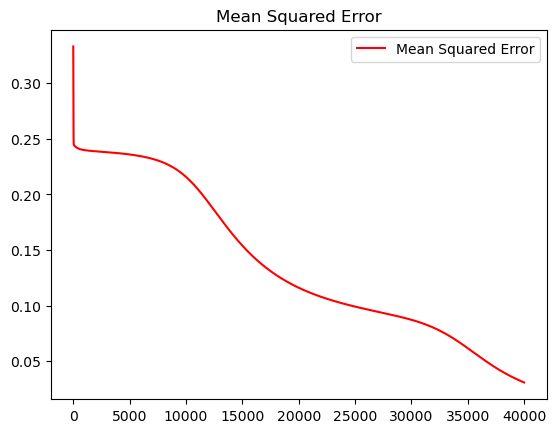

In [23]:
plt.plot(results.mse, color='red', label="Mean Squared Error")
plt.title("Mean Squared Error")
plt.legend()
plt.show()

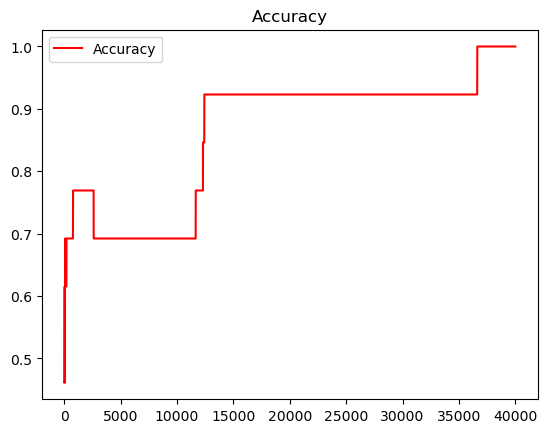

In [24]:
plt.plot(results.accuracy, color='red', label="Accuracy")
plt.title("Accuracy")
plt.legend()
plt.show()

In [25]:
A1, A2 = feedforward_propagation(X_test , W1, W2)
acc = accuracy(A2, y_test)
acc

0.0

## ОПРЕДЕЛЕНИЕ НАПРАВЛЕНИЯ ДВОИЧНОГО СДВИГА

#### Таблица сдвигов с классами 1 и 0

In [26]:
sdvg_df = []
for n in [1, 2, 3, 4, 6, 7, 8, 9, 11, 13, 14]:
    bin_n = '0'*(4-len(bin(n)[2:]))+str(bin(n)[2:]) if len(bin(n)[2:]) < 4 else bin(n)[2:]
    bin_l = bin_n[1:] + bin_n[0]
    bin_r = bin_n[-1] + bin_n[:-1]
    print(n, '\t', bin_n, bin_l, bin_r)
    sdvg_df.append([int(bin_n, 2), int(bin_l, 2), 1])
    sdvg_df.append([int(bin_n, 2), int(bin_r, 2), 0])

1 	 0001 0010 1000
2 	 0010 0100 0001
3 	 0011 0110 1001
4 	 0100 1000 0010
6 	 0110 1100 0011
7 	 0111 1110 1011
8 	 1000 0001 0100
9 	 1001 0011 1100
11 	 1011 0111 1101
13 	 1101 1011 1110
14 	 1110 1101 0111


In [27]:
sdvg_df = pd.DataFrame(sdvg_df, columns=['n','shift','type'])

In [28]:
X = sdvg_df[sdvg_df.columns[:-1]]
y = pd.get_dummies(sdvg_df[sdvg_df.columns[-1]]).values

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

#### grid-search

In [ ]:
results_diff = pd.DataFrame(columns=["epoch", "hidden_size", "mse", "accuracy"])
for epoch in [x/4*10**4 for x in range(1, 11)]:
    for hidden_size in [2**x for x in range(1, 11)]:
        _, _, results = backpropagation(X_train, y_train, epoch=int(epoch), learning_rate=0.1, hidden_size=int(hidden_size), itsPrint=False)
        results_diff = results_diff._append({'mse': results.mse.iloc[-1], 
                                             'accuracy': results.accuracy.iloc[-1],
                                             'hidden_size': int(hidden_size),
                                             'epoch': int(epoch)}, ignore_index = True)

In [ ]:
results_diff

#### Минимальное MSE

In [32]:
results_diff.loc[(results_diff['epoch'] == 20000)].mse.min()

0.00182183279015122

In [29]:
W1, W2, results = backpropagation(X_train, y_train, epoch = 20000, learning_rate=0.1, hidden_size=256)

epoch 0: 
	mse: 0.4980703809730809, 	accuracy: 0.5
epoch 2000: 
	mse: 0.0823126857723932, 	accuracy: 0.9444444444444444
epoch 4000: 
	mse: 0.0402638519257204, 	accuracy: 1.0
epoch 6000: 
	mse: 0.020594653174562112, 	accuracy: 1.0
epoch 8000: 
	mse: 0.01235581721877852, 	accuracy: 1.0
epoch 10000: 
	mse: 0.008294734343018619, 	accuracy: 1.0
epoch 12000: 
	mse: 0.006027494583566485, 	accuracy: 1.0
epoch 14000: 
	mse: 0.004641810540578436, 	accuracy: 1.0
epoch 16000: 
	mse: 0.003729174818615018, 	accuracy: 1.0
epoch 18000: 
	mse: 0.0030920991005684764, 	accuracy: 1.0
epoch 20000: 
	mse: 0.0026262167180349035, 	accuracy: 1.0


Построим график ошибок:

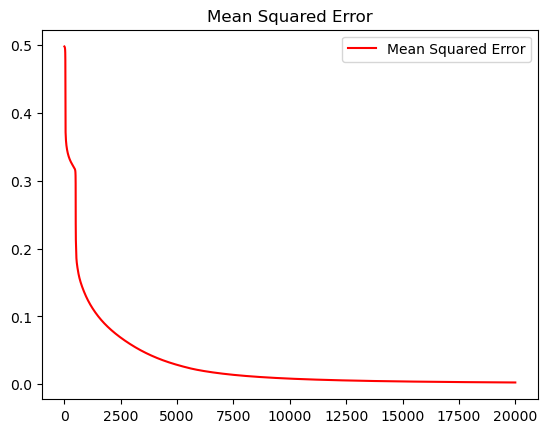

In [30]:
plt.plot(results.mse, color='red', label="Mean Squared Error")
plt.title("Mean Squared Error")
plt.legend()
plt.show()

#### График точности модели

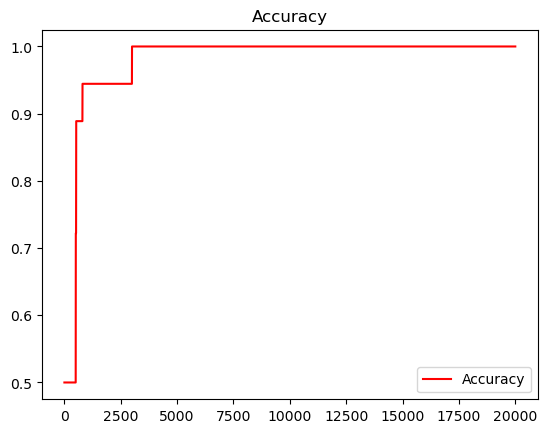

In [31]:
plt.plot(results.accuracy, color='red', label="Accuracy")
plt.title("Accuracy")
plt.legend()
plt.show()

In [32]:
A1, A2 = feedforward_propagation(X_test , W1, W2)
acc = accuracy(A2, y_test)
acc

1.0

## РАСПОЗНАВАНИЕ СИМВОЛОВ

In [33]:
symb_3_3 = [[1, 0, 1, 0, 1, 0, 1, 0, 1, 'x'],
            [1, 0, 1, 0, 1, 0, 0, 1, 0, 'y'],
            [0, 1, 0, 0, 1, 0,  0, 1, 0, 'i'],
            [1, 1, 1, 1, 0, 0, 1, 1, 1, 'c']]

In [34]:
symb_3_3_df = pd.DataFrame(symb_3_3, columns=[f'cord{x}' for x in range(9)]+['symb'])
symb_3_3_df

,cord0,cord1,cord2,cord3,cord4,cord5,cord6,cord7,cord8,symb
0,1,0,1,0,1,0,1,0,1,x
1,1,0,1,0,1,0,0,1,0,y
2,0,1,0,0,1,0,0,1,0,i
3,1,1,1,1,0,0,1,1,1,c


In [35]:
X = symb_3_3_df[symb_3_3_df.columns[:-1]]
y = pd.get_dummies(symb_3_3_df[symb_3_3_df.columns[-1]]).values

In [36]:
pd.DataFrame(y, columns=symb_3_3_df[symb_3_3_df.columns[-1]][::-1])

symb,c,i,y,x
0,False,False,True,False
1,False,False,False,True
2,False,True,False,False
3,True,False,False,False


In [37]:
W1, W2, results = backpropagation(X, y, epoch = 10000, learning_rate=0.1, hidden_size=32)

epoch 0: 
	mse: 0.23470780806687247, 	accuracy: 0.25
epoch 1000: 
	mse: 0.01576455156427963, 	accuracy: 1.0
epoch 2000: 
	mse: 0.005539119819589461, 	accuracy: 1.0
epoch 3000: 
	mse: 0.0030887718763117807, 	accuracy: 1.0
epoch 4000: 
	mse: 0.0020752817718072657, 	accuracy: 1.0
epoch 5000: 
	mse: 0.0015381583027672576, 	accuracy: 1.0
epoch 6000: 
	mse: 0.001210642732558216, 	accuracy: 1.0
epoch 7000: 
	mse: 0.0009921323604668419, 	accuracy: 1.0
epoch 8000: 
	mse: 0.0008369343972512205, 	accuracy: 1.0
epoch 9000: 
	mse: 0.000721516852911976, 	accuracy: 1.0
epoch 10000: 
	mse: 0.0006326077830391346, 	accuracy: 1.0


#### График ошибки модели

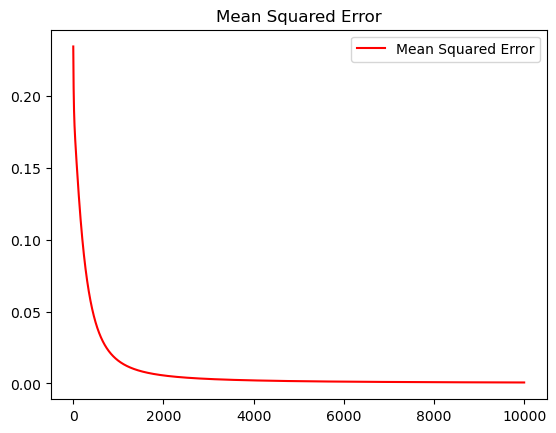

In [38]:
plt.plot(results.mse, color='red', label="Mean Squared Error")
plt.title("Mean Squared Error")
plt.legend()
plt.show()

График точности модели:

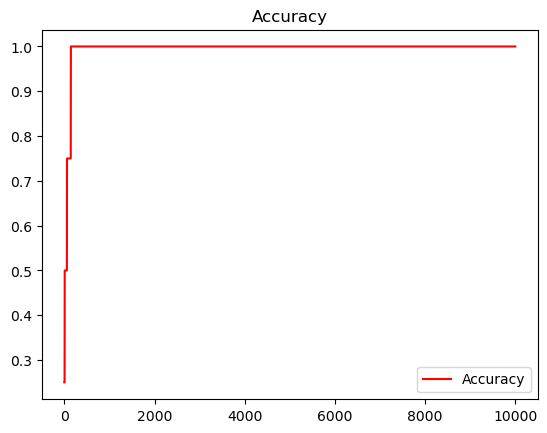

In [39]:
plt.plot(results.accuracy, color='red', label="Accuracy")
plt.title("Accuracy")
plt.legend()
plt.show()

In [40]:
A1, A2 = feedforward_propagation([1, 1, 1, 1, 0, 0, 1, 1, 0], W1, W2)

In [41]:
pd.DataFrame([A2], columns=symb_3_3_df[symb_3_3_df.columns[-1]][::-1])

symb,c,i,y,x
0,0.947143,0.026008,0.005551,0.026703


### Дополнительное задание 7.9

In [49]:
symbalcut_7_5 = [[0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,1,1,1,1,1,1,1,0,0,0,1,1,0,0,0,1, 'a'],
                 [1,1,1,1,1,1,0,0,0,1,1,0,0,0,1,1,1,1,1,1,1,0,0,0,1,1,0,0,0,1,1,1,1,1,1, 'b'],
                 [1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,1,1,1, 'c'],
                 [1,1,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,1,1,0,0,0,1,1,0,0,1,0,1,1,1,0,0, 'd']]

In [50]:
symbalcut_7_5_df = pd.DataFrame(symbalcut_7_5, columns=[f'cord{x}' for x in range(len(symbalcut_7_5[0])-1)]+['symb'])

In [51]:
X = symbalcut_7_5_df[symbalcut_7_5_df.columns[:-1]]
y = pd.get_dummies(symbalcut_7_5_df[symbalcut_7_5_df.columns[-1]]).values

In [52]:
pd.DataFrame(y, columns=symbalcut_7_5_df[symbalcut_7_5_df.columns[-1]])

symb,a,b,c,d
0,True,False,False,False
1,False,True,False,False
2,False,False,True,False
3,False,False,False,True


In [53]:
W1, W2, results = backpropagation(X, y, epoch = 20000, learning_rate=0.1, hidden_size=32)

epoch 0: 
	mse: 0.2205551454049694, 	accuracy: 0.25
epoch 2000: 
	mse: 0.0028413329664913776, 	accuracy: 1.0
epoch 4000: 
	mse: 0.001169215684278732, 	accuracy: 1.0
epoch 6000: 
	mse: 0.0007147866137793752, 	accuracy: 1.0
epoch 8000: 
	mse: 0.0005087291346886048, 	accuracy: 1.0
epoch 10000: 
	mse: 0.0003924988451835853, 	accuracy: 1.0
epoch 12000: 
	mse: 0.00031835849088112603, 	accuracy: 1.0
epoch 14000: 
	mse: 0.00026716117180879503, 	accuracy: 1.0
epoch 16000: 
	mse: 0.00022978682909615019, 	accuracy: 1.0
epoch 18000: 
	mse: 0.00020135767142650407, 	accuracy: 1.0
epoch 20000: 
	mse: 0.00017903654522703684, 	accuracy: 1.0


In [54]:
A1, A2 = feedforward_propagation([1,1,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,1,1,0,0,0,1,1,0,0,1,1,1,1,1,0,0], W1, W2)

In [55]:
pd.DataFrame([A2], columns=symbalcut_7_5_df[symbalcut_7_5_df.columns[-1]])

symb,a,b,c,d
0,0.020768,0.118397,0.003518,0.901899


## ИСКУССТВЕННЫЙ НОС

In [56]:
chemistry = [[1, 0.05, 0.1, 0.3, 0.07, 0.08, 0.2, 0.05, 0.2, 0.6, 0.8, 'no']]

In [57]:
chemistry_df = pd.DataFrame(chemistry, columns=[f'attr{x}' for x in range(len(chemistry[0])-1)]+['mixture'])
chemistry_df

,attr0,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,mixture
0,1,0.05,0.1,0.3,0.07,0.08,0.2,0.05,0.2,0.6,0.8,no


In [58]:
X = chemistry_df[chemistry_df.columns[:-1]]
y = pd.get_dummies(chemistry_df[chemistry_df.columns[-1]]).values

#### Целевая колонка с возможными результатами

In [59]:
pd.DataFrame(y, columns=chemistry_df[chemistry_df.columns[-1]])

mixture,no
0,True


In [60]:
W1, W2, results = backpropagation(X, y, epoch = 20000, learning_rate=0.1, hidden_size=32)

epoch 0: 
	mse: 0.6102815292921865, 	accuracy: 1.0
epoch 2000: 
	mse: 0.00027525884386323446, 	accuracy: 1.0
epoch 4000: 
	mse: 0.0001337379577632501, 	accuracy: 1.0
epoch 6000: 
	mse: 8.797085434318981e-05, 	accuracy: 1.0
epoch 8000: 
	mse: 6.542653812736536e-05, 	accuracy: 1.0
epoch 10000: 
	mse: 5.202897513880965e-05, 	accuracy: 1.0
epoch 12000: 
	mse: 4.315882492615826e-05, 	accuracy: 1.0
epoch 14000: 
	mse: 3.685675146976029e-05, 	accuracy: 1.0
epoch 16000: 
	mse: 3.2150534590089477e-05, 	accuracy: 1.0
epoch 18000: 
	mse: 2.850327354426817e-05, 	accuracy: 1.0
epoch 20000: 
	mse: 2.559439666224614e-05, 	accuracy: 1.0


#### График ошибки

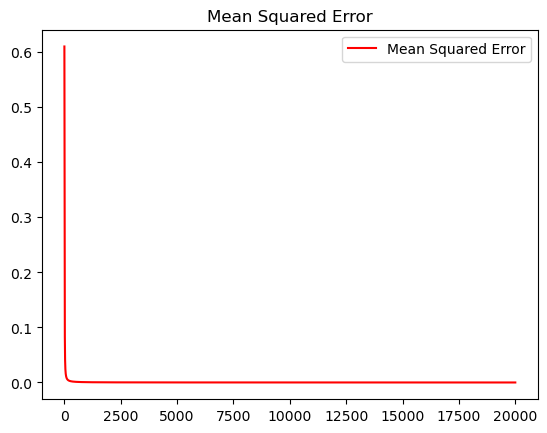

In [61]:
plt.plot(results.mse, color='red', label="Mean Squared Error")
plt.title("Mean Squared Error")
plt.legend()
plt.show()

In [62]:
chemistry = [[1, 0.05, 0.1, 0.3, 0.07, 0.08, 0.2, 0.05, 0.2, 0.6, 0.8, 'no'],
             [0.8, 0.4, 0.7, 0.6, 0.1, 0.5, 1, 0.75, 0.5, 0.7, 0.8, 'acetone'],
             [0.9, 0.2, 0.4, 0.5, 0.1, 0.7, 0.6, 0.5, 0.5, 0.7, 0.8, 'ammonia'],
             [0.85, 0.7, 0.8, 0.65, 0.1, 0.4, 1, 0.7, 0.4, 0.6, 0.7, 'isopropanol'],
             [0.9, 0.3, 0.3, 0.4, 0.04, 0.1, 0.5, 0.3, 0.2, 0.7, 0.8, 'white_stroke'],
             [0.95, 0.18, 0.21, 0.3, 0.05, 0.1, 0.3, 0.2, 0.2, 0.5, 0.7, 'vinegar']]

In [63]:
chemistry_df = pd.DataFrame(chemistry, columns=[f'attr{x}' for x in range(len(chemistry[0])-1)]+['mixture'])
chemistry_df = chemistry_df.sort_values('mixture')
chemistry_df

,attr0,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,mixture
1,0.80,0.40,0.70,0.60,0.10,0.50,1.0,0.75,0.5,0.7,0.8,acetone
2,0.90,0.20,0.40,0.50,0.10,0.70,0.6,0.50,0.5,0.7,0.8,ammonia
3,0.85,0.70,0.80,0.65,0.10,0.40,1.0,0.70,0.4,0.6,0.7,isopropanol
0,1.00,0.05,0.10,0.30,0.07,0.08,0.2,0.05,0.2,0.6,0.8,no
5,0.95,0.18,0.21,0.30,0.05,0.10,0.3,0.20,0.2,0.5,0.7,vinegar
4,0.90,0.30,0.30,0.40,0.04,0.10,0.5,0.30,0.2,0.7,0.8,white_stroke


In [65]:
X = chemistry_df[chemistry_df.columns[:-1]]
y = pd.get_dummies(chemistry_df[chemistry_df.columns[-1]]).values

In [66]:
pd.DataFrame(y, columns=chemistry_df[chemistry_df.columns[-1]])

mixture,acetone,ammonia,isopropanol,no,vinegar,white_stroke
0,True,False,False,False,False,False
1,False,True,False,False,False,False
2,False,False,True,False,False,False
3,False,False,False,True,False,False
4,False,False,False,False,True,False
5,False,False,False,False,False,True


In [67]:
W1, W2, results = backpropagation(X, y, epoch = 30000, learning_rate=0.1, hidden_size=32)

epoch 0: 
	mse: 0.432876702575003, 	accuracy: 0.16666666666666666
epoch 3000: 
	mse: 0.0749752609679264, 	accuracy: 1.0
epoch 6000: 
	mse: 0.047187761835666184, 	accuracy: 1.0
epoch 9000: 
	mse: 0.028842536102846785, 	accuracy: 1.0
epoch 12000: 
	mse: 0.01774439855212747, 	accuracy: 1.0
epoch 15000: 
	mse: 0.011338230003871966, 	accuracy: 1.0
epoch 18000: 
	mse: 0.007583245032551063, 	accuracy: 1.0
epoch 21000: 
	mse: 0.005354432245978499, 	accuracy: 1.0
epoch 24000: 
	mse: 0.003982643623438919, 	accuracy: 1.0
epoch 27000: 
	mse: 0.00309526996483888, 	accuracy: 1.0
epoch 30000: 
	mse: 0.0024919606157276526, 	accuracy: 1.0


Отобразим график ошибки для полученной модели:

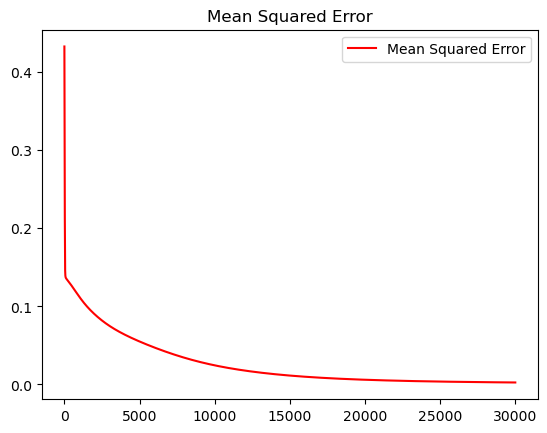

In [68]:
plt.plot(results.mse, color='red', label="Mean Squared Error")
plt.title("Mean Squared Error")
plt.legend()
plt.show()

#### Протестируем на синтетическом примере для уксуса

In [69]:
A1, A2 = feedforward_propagation([0.9, 0.13, 0.24, 0.35, 0.051, 0.12, 0.27, 0.2, 0.2, 0.5, 0.69], W1, W2)

In [70]:
pd.DataFrame([A2], columns=chemistry_df[chemistry_df.columns[-1]])

mixture,acetone,ammonia,isopropanol,no,vinegar,white_stroke
0,0.00002,0.010977,0.004816,0.078961,0.649794,0.042698


## ПРОГНОЗИРОВАНИЕ ВРЕМЕННЫХ РЯДОВ

#### Генерация случайных данных

In [71]:
data = [np.random.randint(0, 10) for _ in range(100)]

In [72]:
data_df = pd.DataFrame([[i, x] for i, x in enumerate(data)], columns=['numb', 'rand'])
data_df

,numb,rand
0,0,5
1,1,0
2,2,5
3,3,2
4,4,1
...,...,...
95,95,7
96,96,3
97,97,4
98,98,8


In [73]:
scaler = MinMaxScaler()
scaler.fit(data_df)
data_df = pd.DataFrame(scaler.transform(data_df), columns=['numb', 'rand'])

#### Исследование на скоррелированность

In [74]:
data_df.corr()

,numb,rand
numb,1.000000,0.056906
rand,0.056906,1.000000


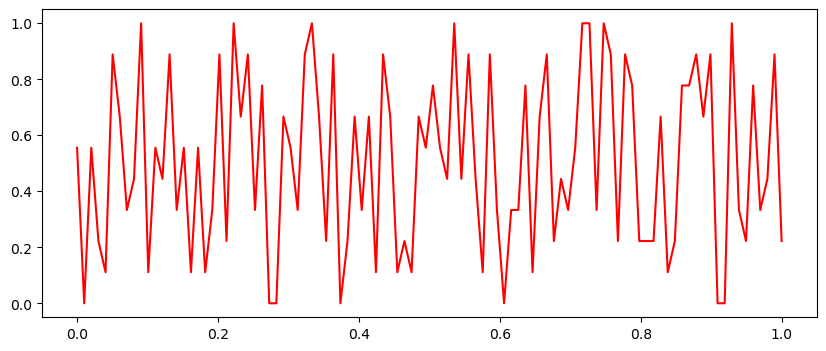

In [76]:
plt.figure(figsize=(10, 4))
plt.plot(data_df.numb, data_df.rand, color='red')
plt.show()

In [77]:
X = data_df[data_df.columns[:-1]]
y = pd.get_dummies(data_df[data_df.columns[-1]]).values

In [78]:
X_train, X_test, y_train, y_test = X[:90], X[90:], y[:90], y[90:]

In [79]:
W1, W2, results = backpropagation(X_train, y_train, epoch = 100000, learning_rate=0.1, hidden_size=64, isMape=True)

epoch 0: 	mape: 5.215568761825631
epoch 10000: 	mape: 1.7820154214305224
epoch 20000: 	mape: 1.7683912238602832
epoch 30000: 	mape: 1.7598710756556772
epoch 40000: 	mape: 1.7547115568938956
epoch 50000: 	mape: 1.7514975511137947
epoch 60000: 	mape: 1.7494182734252446
epoch 70000: 	mape: 1.748013886582164
epoch 80000: 	mape: 1.747022665367308
epoch 90000: 	mape: 1.7462934018541176
epoch 100000: 	mape: 1.745736659016705


#### Функцию, которая конвертирует значения в соответствии с их весами

In [80]:
def converted(A2, scale=10):
    y_pred = []
    xmin, xmax = 0, scale-1
    for y_pr in A2:
        max_y, max_w = 0, 0
        for i, w in enumerate(y_pr):
            if w > max_w:
                max_y = i
                max_w = w
        y_pred.append(max_y)
    return (np.array(y_pred) - xmin)/(xmax-xmin)

In [81]:
A1, A2 = feedforward_propagation(X_test, W1, W2)

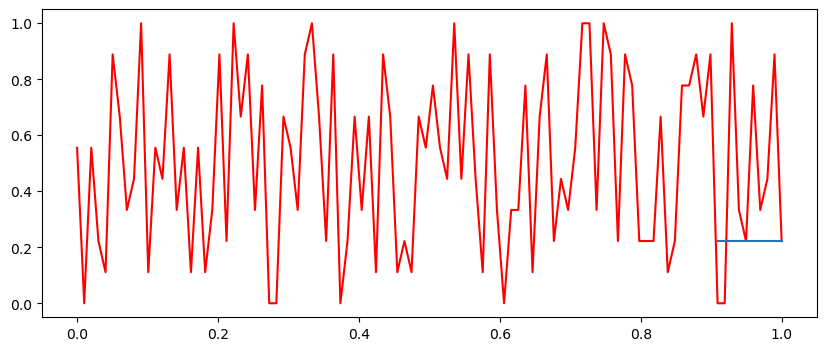

In [82]:
plt.figure(figsize = (10, 4))
plt.plot(data_df.numb, data_df.rand, color='red')
plt.plot(data_df.numb.values[90:], converted(A2))
plt.show()

#### Ошибка MAPE

In [83]:
mape_ = mape(converted(A2), data_df.rand.values[90:])
mape_

0.6842105263157896

In [84]:
data = [np.random.randint(0, 100) for _ in range(100)]

In [86]:
data_df = pd.DataFrame([[i, x] for i, x in enumerate(data)], columns=['numb', 'rand'])
data_df

,numb,rand
0,0,44
1,1,95
2,2,25
3,3,64
4,4,72
...,...,...
95,95,51
96,96,49
97,97,86
98,98,97


In [87]:
scaler = MinMaxScaler()
scaler.fit(data_df)
data_df = pd.DataFrame(scaler.transform(data_df), columns=['numb', 'rand'])

In [88]:
data_df.corr()

,numb,rand
numb,1.000000,-0.114518
rand,-0.114518,1.000000


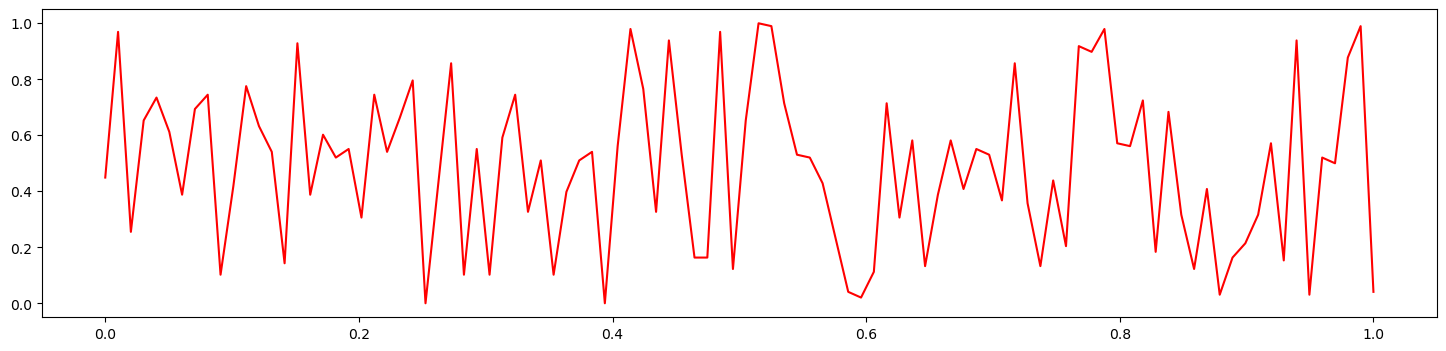

In [90]:
plt.figure(figsize = (18, 4))
plt.plot(data_df.numb, data_df.rand, color='red')
plt.show()

In [91]:
X = data_df[data_df.columns[:-1]]
y = pd.get_dummies(data_df[data_df.columns[-1]]).values
X_train, X_test, y_train, y_test = X[:90], X[90:], y[:90], y[90:]

In [92]:
W1, W2, results = backpropagation(X_train, y_train, epoch = 100000, learning_rate=0.1, hidden_size=128, isMape=True)

epoch 0: 	mape: 29.253943246014032
epoch 10000: 	mape: 1.9697227051629633
epoch 20000: 	mape: 2.0031890839243265
epoch 30000: 	mape: 2.029308967008558
epoch 40000: 	mape: 2.042688906093344
epoch 50000: 	mape: 2.0528450481025637
epoch 60000: 	mape: 2.061084093184512
epoch 70000: 	mape: 2.067162301188619
epoch 80000: 	mape: 2.070937017449625
epoch 90000: 	mape: 2.0725122529015634
epoch 100000: 	mape: 2.0722229377143866


In [93]:
A1, A2 = feedforward_propagation(X_test, W1, W2)

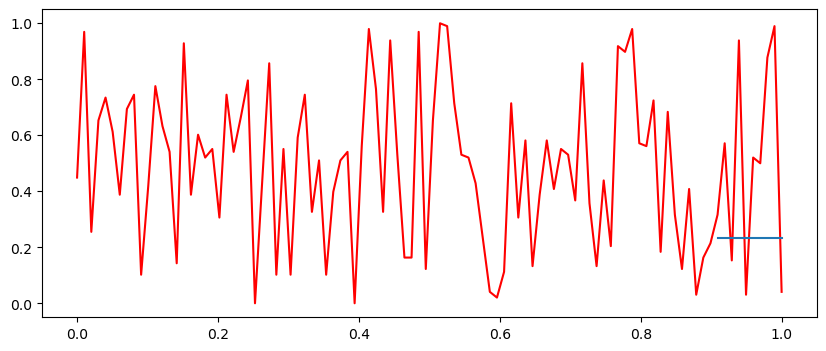

In [94]:
plt.figure(figsize = (10, 4))
plt.plot(data_df.numb, data_df.rand, color='red')
plt.plot(data_df.numb.values[90:], converted(A2, scale=100))
plt.show()

#### Оценка качества

In [95]:
mape_ = mape(converted(A2, scale=100), data_df.rand.values[90:])
mape_

0.7209282911762253

#### Проанализируем ряды реальных данных

In [35]:
dataset = pd.read_csv('D:\Загрузки\dataset.txt', sep=' ')
dataset

,Годы,y,x1,x2,x3,x4,x5
0,1990,"475,3","0,986","0,978","0,970","1,060","0,880"
1,1991,"413,5","0,876","0,858","0,870","1,082","0,840"
2,1992,"401,7","0,699","0,690","0,764","1,104","0,480"
3,1993,"400,9","0,605","0,619","0,685","1,126","0,475"
4,1994,"401,3","0,514","0,559","0,566","1,148","0,525"
5,1995,"402,5","0,483","0,492","0,534","1,170","0,575"
6,1996,"401,1","0,459","0,501","0,570","1,230","0,582"
7,1997,"404,4","0,464","0,506","0,593","1,304","0,539"
8,1998,"406,2","0,478","0,430","0,640","1,336","0,512"
9,1999,"412,2","0,507","0,587","0,695","1,370","0,519"


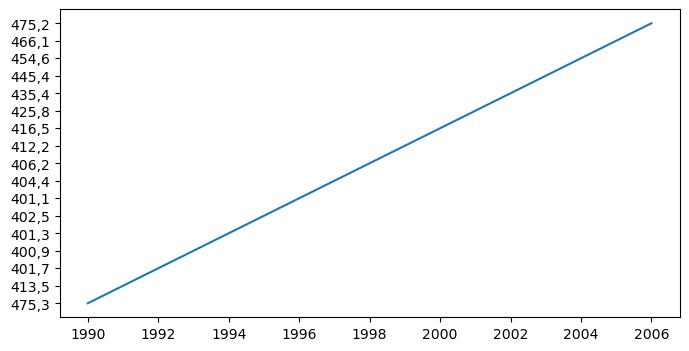

In [36]:
plt.figure(figsize = (8, 4))
plt.plot(dataset['Годы'], dataset.y)
plt.show()

In [37]:
X = dataset[['x1', 'x2', 'x3', 'x4']].values
y = pd.get_dummies(dataset['y']).values
X_train, X_test, y_train, y_test = X[:15], X[15:], y[:15], y[15:]

In [38]:
W1, W2, results = backpropagation(X_train, y_train, epoch = 100000, learning_rate=0.1, hidden_size=128, isMape=True)

TypeError: can't multiply sequence by non-int of type 'float'

In [234]:
W1.shape

(5, 128)

In [236]:
W2.shape

(128, 17)

In [230]:
A1, A2 = feedforward_propagation(X_test, W1, W2)

In [231]:
mape(np.array([425.8, 435.4]), np.array([466.1, 475.2]))

0.08509508127058327

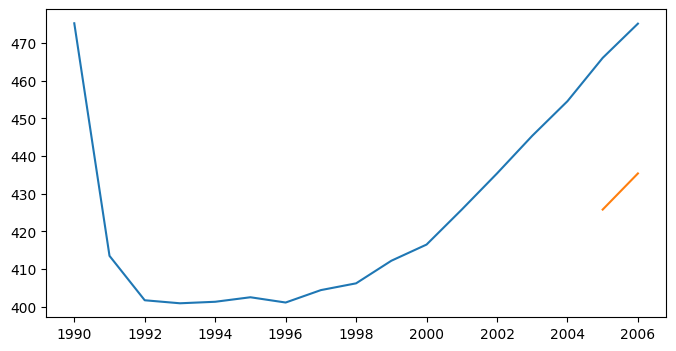

In [232]:
plt.figure(figsize = (8, 4))
plt.plot(dataset['Годы'], dataset.y)
plt.plot(dataset['Годы'][-2:], np.array([425.8, 435.4]))
plt.show()